In [13]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.get_dataset_names()
data = sns.load_dataset(name = 'iris')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
iris = load_iris()
data1 = iris.data
data4 = minmax_scale(data1)

C:\Users\Bestc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


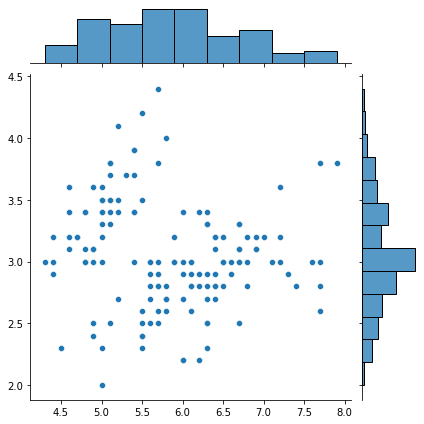

C:\Users\Bestc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


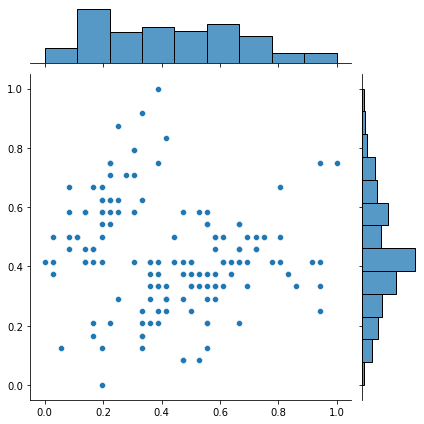

In [15]:
sns.jointplot(data1[:, 0], data1[:, 1])
plt.show()
sns.jointplot(data4[:, 0], data4[:, 1])
plt.show()

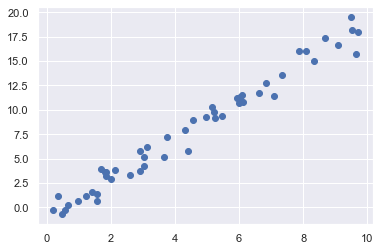

In [16]:
sns.set()
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x -1 + rng.randn(50)
plt.scatter(x, y)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
LinearRegression(copy_X = True, fit_intercept = True, n_jobs = 1, normalize = False)

LinearRegression(n_jobs=1)

In [21]:
X = x[:, np.newaxis]
x.shape, X.shape

((50,), (50, 1))

In [24]:
model.fit(X, y)

LinearRegression()

In [25]:
model.coef_, model.intercept_

(array([1.9776566]), -0.903310725531111)

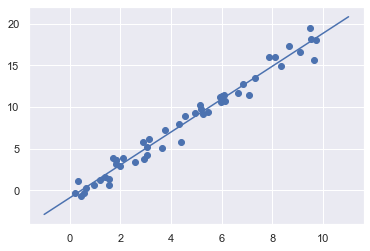

In [28]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit)

C:\Users\Bestc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


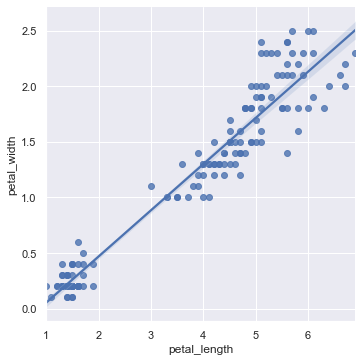

In [29]:
sns.lmplot('petal_length', 'petal_width', data)

In [36]:
# KNN(K-Nearest Neighbor) 모델
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [37]:
iris = load_iris()

In [41]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['species'] = pd.Series(iris.target)

In [50]:
def setcolor(value):
    color = []
    colors = ['r', 'g', 'b']
    for i in value.values:
        color.append(colors[i])
    return color

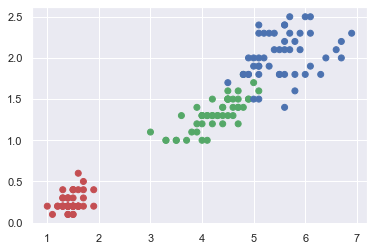

In [51]:
plt.scatter(x = df['petal length (cm)'], y = df['petal width (cm)'], color = setcolor(df['species']))

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
column_train = ['petal length (cm)', 'petal width (cm)']
neigh_3 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
neigh_3_train = neigh_3.fit(df[column_train], df['species'])

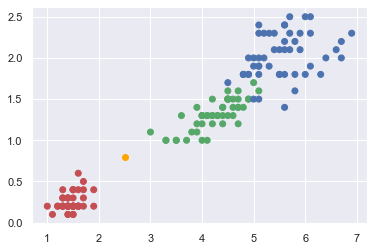

In [54]:
new_data = np.array([2.5, 0.8]).reshape(1, -1)
plt.scatter(x = df['petal length (cm)'], y = df['petal width (cm)'], color = setcolor(df['species']))
plt.scatter(x = new_data[0, 0], y = new_data[0, 1], color = 'orange')

In [55]:
neigh_3_class = neigh_3_train.predict(new_data)
print(neigh_3_class)

[1]


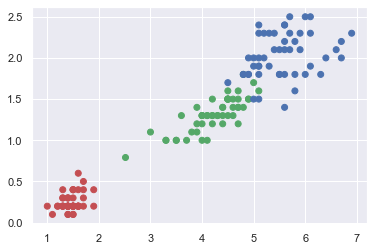

In [56]:
plt.scatter(x = df['petal length (cm)'], y = df['petal width (cm)'], color = setcolor(df['species']))

c3 = pd.DataFrame(np.array(neigh_3_class), columns = ['c'])
col3 = c3['c']
plt.scatter(x = new_data[0, 0], y = new_data[0, 1], color = setcolor(col3))

In [57]:
column_train = ['petal length (cm)', 'petal width (cm)']
neigh_7 = KNeighborsClassifier(n_neighbors = 7, weights = 'distance')
neigh_7_train = neigh_7.fit(df[column_train], df['species'])

In [58]:
neigh_7_class = neigh_7_train.predict(new_data)
print(neigh_7_class)

[0]


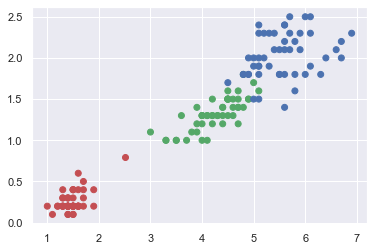

In [59]:
plt.scatter(x = df['petal length (cm)'], y = df['petal width (cm)'], color = setcolor(df['species']))

c7 = pd.DataFrame(np.array(neigh_7_class), columns = ['c'])
col7 = c7['c']
plt.scatter(x = new_data[0, 0], y = new_data[0, 1], color = setcolor(col7))

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(df[column_train], df['species'], test_size = 0.33)

In [70]:
neigh3 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
neigh3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [71]:
print(classification_report(y_test, neigh3.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.95      0.88      0.91        24
           2       0.77      0.91      0.83        11

    accuracy                           0.92        50
   macro avg       0.91      0.93      0.92        50
weighted avg       0.93      0.92      0.92        50

